# Opis projektu

**Temat projektu:**
Wpływ przebiegu samochodu na jego cenę.

**Cel dodatkowy:**
 Przeanalizować wpływ zmiennej jakościowej samochodu - rodzaju samochodu - na jego cenę.

**Hipoteza badawcza**
Im wyższa wartość przebiegu samochodu, tym niższa jego cena.

**Charakterystyka zbioru:** Badany zbiór to dane z komisu samochodowego ulokowanego w Amreyce Północnej. Zbiór zawiera 5000 rekordów, gdzie każdy rekord zawiera informacje na temat samochodu, są to : ID,Price, Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags.

Przykładową zmienną jakościową jest Manufacturer odpowiadający producentowi samochodu, dla przyładu HONDA lub FORD.
Zmienne ilościowe to na przykład Price odpowiadające cenie samochodu czy Mileage odpowiadajace przebiegowi samochodu. Te zmienne ilościowe będą niezbędne do wykonania analizy zawartej w temacie projektu.

Zbiór został odpowiednio przygowowany do analizy. Zdezydowaliśmy się na analizę pierwszych 3000 rekordów. Ze zbioru została usunięta kolumna 'Levy', ponieważ zawierała bardzo dużo braków i nie byłaby konieczna do prowadzonej przez nas analizy. Zmodyfikowany zsotał format wartości kolumny Mileage - usunięty został dopisek 'km' przy liczbie kilomerów oraz typ kolumny został zmieiony na typ liczbowy. Usunięte zostały rekordy które miały nierealne wartości przebiegu tj. Mileage > 2 000 000. Zostały także usunięte rekordy z wyraźnie zaniżoną ceną to znaczy z ceną poniżej 500.

# Prezentacja danych

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [123]:
df = pd.read_csv('car_price_prediction.csv')
df['Mileage'] = df['Mileage'].str.replace('km', '').astype(int)
df = df.drop(columns=['Levy'])
df = df[df['Mileage'] <= 2000000]
df = df[df['Price'] >= 500]
df = df.head(3000)

In [56]:

print(df.loc[df['Price'] == 549])

            ID  Price   Manufacturer       Model  Prod. year   Category  \
7     45816158    549        HYUNDAI      Sonata        2013      Sedan   
15    45465200    549         TOYOTA         CHR        2018       Jeep   
18    45772104    549        HYUNDAI      Sonata        2006      Sedan   
26    45759112    549          LEXUS      GX 470        2008       Jeep   
44    45810322    549        PORSCHE     Cayenne        2010       Jeep   
92    45769914    549         SUBARU    Forester        2012       Jeep   
108   45760895    549            BMW         535        2013      Sedan   
132   45767013    549         NISSAN      Maxima        2004      Sedan   
227   45769229    549          MAZDA        CX-7        2011      Sedan   
291   45811155    549        HYUNDAI      Sonata        2017      Sedan   
368   45815351    549          LEXUS      RX 350        2010       Jeep   
523   45816149    549        HYUNDAI     Elantra        2014      Sedan   
1002  45813251    549    

Kolumna Milage została zmodyfikowana tak, aby przedstawiała wartość liczbową.

# Statystyczny opis struktury analizowanych danych

In [57]:
df.describe()


,ID,Price,Prod. year,Mileage,Cylinders,Airbags
count,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,4.560563e+07,18877.984000,2010.871333,1.421999e+05,4.552667,6.468000
std,7.538672e+05,21306.828096,5.677986,1.126074e+05,1.219722,4.184991
min,2.813594e+07,549.000000,1953.000000,0.000000e+00,1.000000,0.000000
25%,4.572036e+07,7758.500000,2009.000000,7.084000e+04,4.000000,4.000000
50%,4.577376e+07,14335.000000,2012.000000,1.250000e+05,4.000000,4.000000
75%,4.580219e+07,23131.250000,2014.000000,1.850000e+05,4.000000,12.000000
max,4.581665e+07,627220.000000,2020.000000,1.440000e+06,16.000000,16.000000


Analizując powyższe dane Count - czyli ilość ważnych wyników, dla każdego pomiaru jest to 3000,
czyli wszystkie dane są prawidłowe - nie zawierają wartości NA.

**Średnia** cena samochodu wynosi 18 877, a **odchylenie standadrowe** dla kolumny cena wynosi 21 308 co oznacza że wartości są dosyć mocno rozproszone wokół średniej. **Mediana** dla ceny to 14 335. **Najniższa cena** samochodu wynosi 549, zaś **najwyższa** to 627 220. Mimo tak wysokiej maksymalnej ceny **75% wartości** cen samochodów plasuje się poniżej 23 131.

**Średni przebieg ** samochodu wynosi 142 199 km. **Odchylenie standardowe** wynosi 126 074km, co pokazuje że wartości są rozproszone wokół średniej nie tak bardzo jak w przypadku ceny, jednak także dosyć rozproszone. **Mediana** dla przebiegu to 125 000 km. Minimalny przebieg to 0km co oznacza nowy samochód, maksymalny przbieg to 1 440 000 km, co jest realną wartością. **75% wartości** przebiegów jest mniejsza niż 184 000 km.

## Zmienne jakościowe

In [58]:
df.describe(include=[object])

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Wheel,Color
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,47,578,11,2,6,81,4,3,3,2,16
top,HYUNDAI,Sonata,Sedan,Yes,Petrol,2,Automatic,Front,04-May,Left wheel,Black
freq,636,175,1370,2129,1612,628,2056,2060,2831,2752,794


Powyższa tabela przedstawia opis wszystkich zmiennych jakościowych. Możemy z niej odczytać nastepujące informacje:


*   Mamy 47 unikatowych producentów samochodów, gdzie najpopularniejszym producentem jest HYUNDAI
*   Mamy 578 unikatówych modeli samochodów
*   11 kategorii samochodów, najpopularniejszym jest Sedan - ~45,5%
*   Znaczna część samochodów posiada skórzane wnętrze - ~71%


*   Mamy aż 8 rodzajów napędu paliwowego, najpopularniejszym jest zwyczajne paliwo - ~53%
*   Mamy 4 rodzaje skrzyni biegów, gdzie najpopularniejsza jest skrzyni automatyczna - ~68%

*   Najpopularniejszym kolorem samochodu jest czarny - ~26%







In [92]:
value_counts = df['Category'].value_counts()
print(value_counts)

Category
Sedan          1370
Jeep            813
Hatchback       429
Minivan         121
Coupe            98
Universal        62
Microbus         49
Goods wagon      38
Pickup           12
Cabriolet         6
Limousine         2
Name: count, dtype: int64


# Histogramy

In [59]:
import matplotlib.pyplot as plt

## Histogram - Cena samochodu

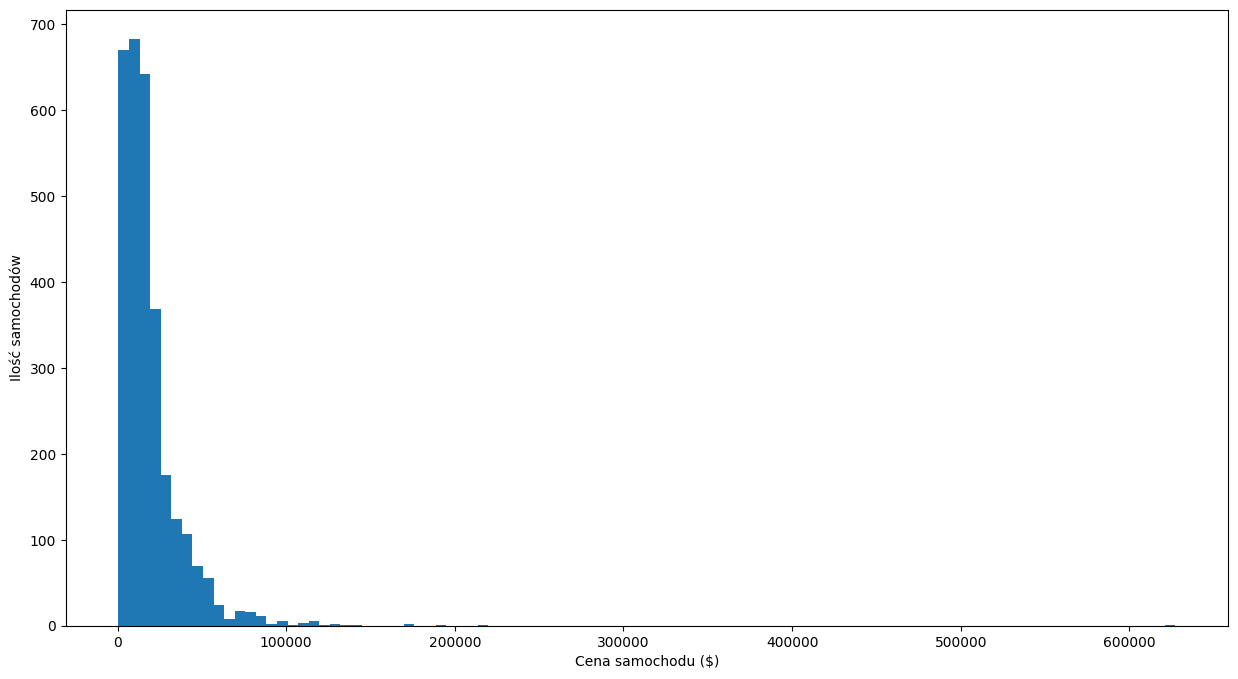

In [66]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(df['Price'], bins=100)

ax.set_xlabel('Cena samochodu ($)')
ax.set_ylabel('Ilość samochodów')

plt.show()

Z powyższego histogramu widać, że dominujące wartości znajdują się poniżej wartości 100 000 dolarów. Bardzo mała ilość samochodów osiąga cenę większą, niż 100 000.
Wykres jest asymetryczny prawoskośny, co jest bardzo widoczne przez bardzo duży pik wartości na początku oraz szybko malejące wartości.

Powyższy wykres podzielimy na dwa przedziały, dla lepszej analizy.

## Histogram - Ceny w przedziale <500$, 100 000$>

---






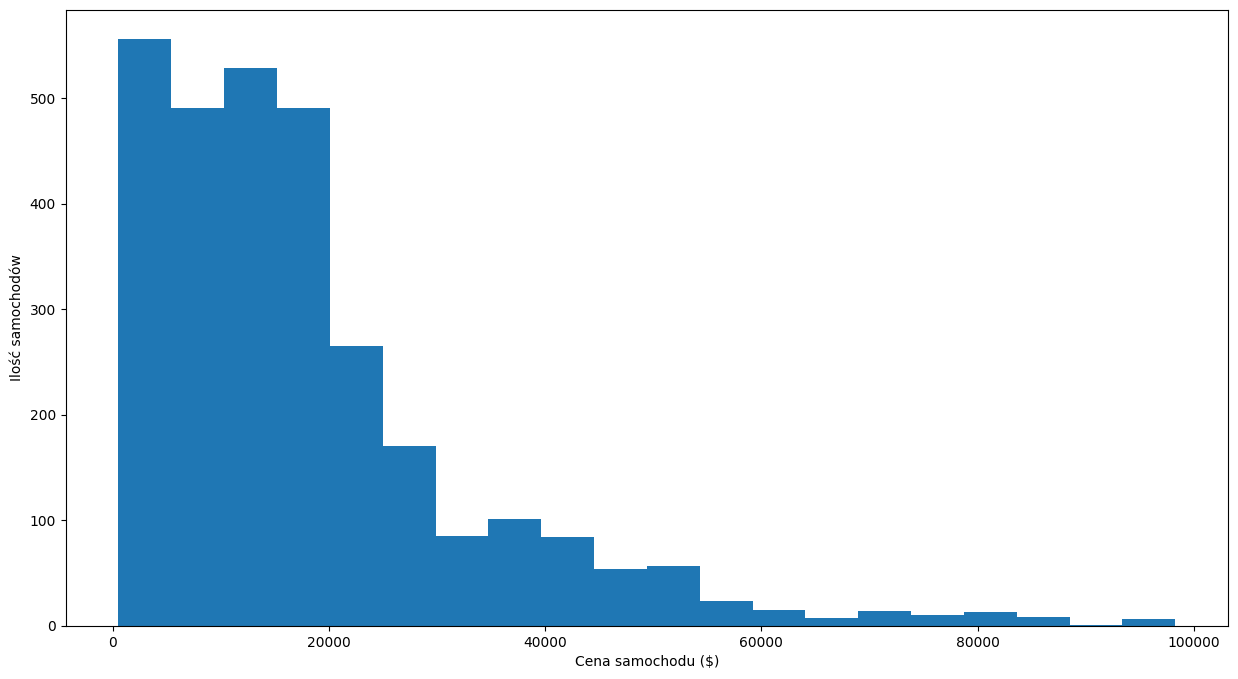

In [67]:
fig, ax = plt.subplots(figsize=(15,8))

df10 = df[df['Price'] <= 100000]

ax.hist(df10['Price'], bins=20)

ax.set_xlabel('Cena samochodu ($)')
ax.set_ylabel('Ilość samochodów')
plt.show()

Powyższy histogram przedstawia ceny samochodów tylko do 100 000. Jak widać najliczniejsza wartości znajdują się w przedziale do 20 000. Jak mogliśmy zauważyć we wczesniejszej analizie statystycznej 75% cen jest mniejsza od ~23 000.


## Histogram - Cena w przedziale powyżej 100 000


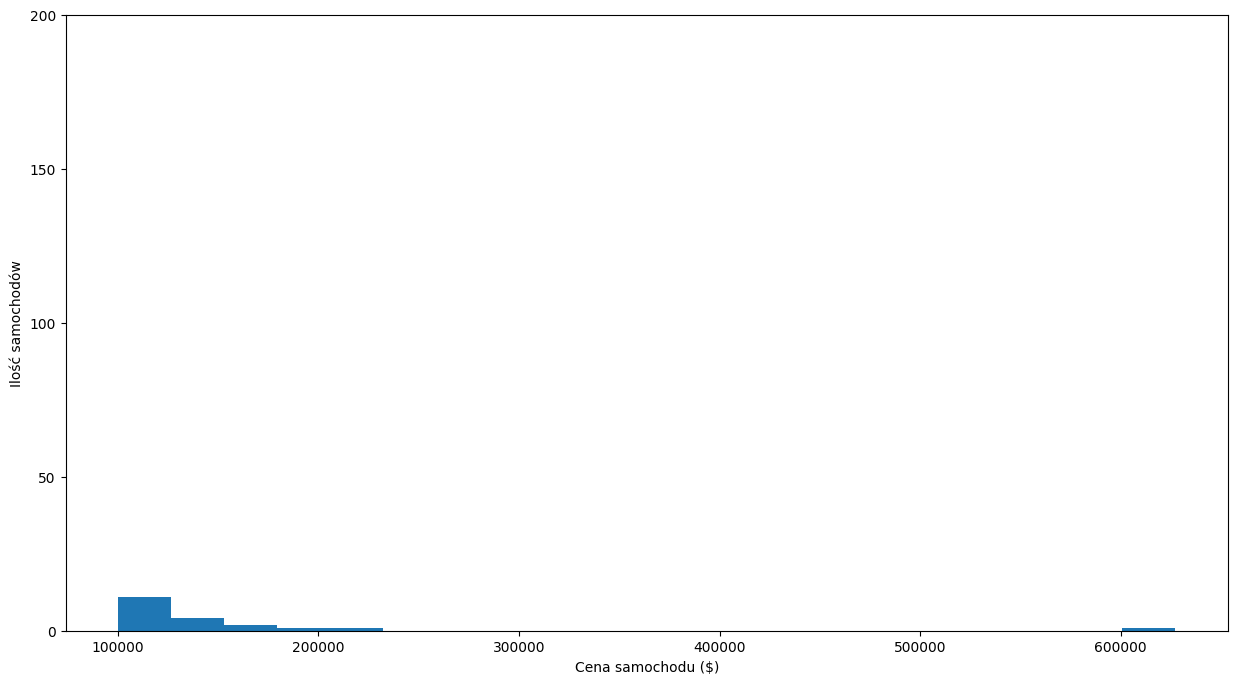

In [72]:
fig, ax = plt.subplots(figsize=(15,8))

df10 = df[df['Price'] >= 100000]

ax.hist(df10['Price'], bins=20)
ax.set_yticks(range(0, 250, 50))

ax.set_xlabel('Cena samochodu ($)')
ax.set_ylabel('Ilość samochodów')

plt.show()

Powyższy histogram przedstawia ilość samochodów z cenami powyżej 100 000. Ilość samochodów z takimi cenami jest niewielki. Cenę powyżej 250 000 ma  tylko jednej samochód przedstawiony poniżej.

Cenę powyżej 150 000 mają jedynie pojedyńcze samochody. Dokładnie jest ich 5 jak przedstawia tabela poniżej.

In [75]:
df[df['Price'] > 500000]

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1225,45795524,627220,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12


# Wykres ramka-wąsy

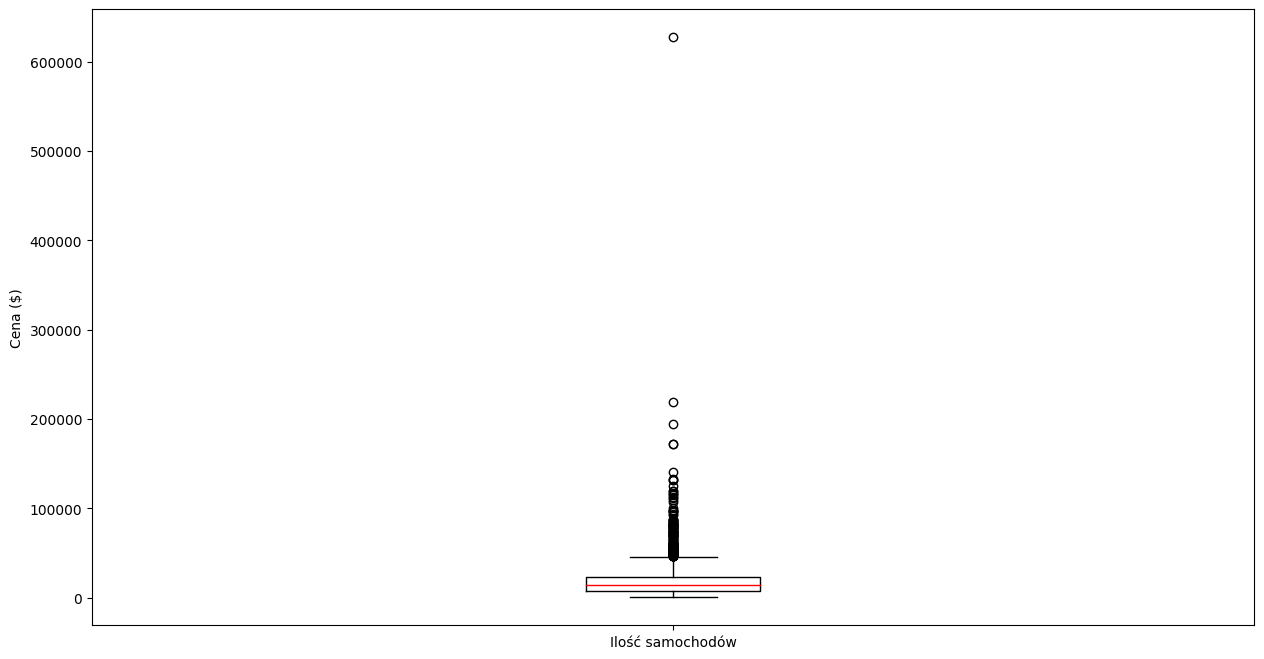

In [79]:
fig, ax = plt.subplots(figsize=(15,8))

ax.boxplot(df['Price'], medianprops={'color': 'red'})

ax.set_xticklabels(["Ilość samochodów"])
ax.set_ylabel('Cena ($)')

plt.show()

Z powyższego wyresu ramka-wąsy można odczytać, że dane są głównie skupione poniżej wartości ~130 000. Dane w okolicy 130 000 oraz powyżej są już wartościami mocno odstającymi, co było też widoczne na pierwszym histogramie, dlatego w celu lepszej analizy przyjrzymy się dokłaniej zakresowi do 130 000.

## Wykres ramka-wąsy - ceny do 130 000

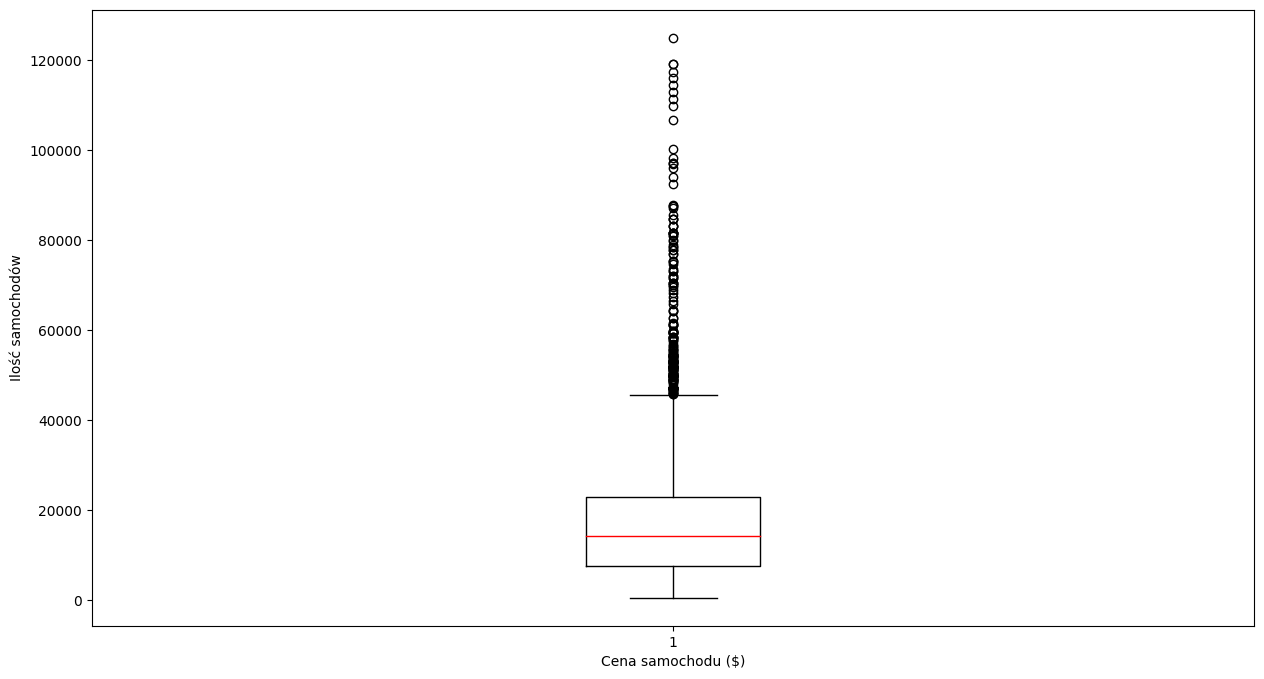

In [80]:
fig, ax = plt.subplots(figsize=(15,8))
df10 = df[df['Price'] <= 130000]
ax.boxplot(df10['Price'], medianprops={'color': 'red'})

ax.set_xlabel('Cena samochodu ($)')
ax.set_ylabel('Ilość samochodów')

plt.show()

Analizując zakres do 130 000 otrzymujemy bardziej widoczny rozkład danych na wykresie. Mediana znajduje się w pobliżu dolnej części pudełka, poniżej 20 000. Analizując długość wąsów oraz rozmieszczenie mediany w pudełku widać, że dane są prawoskośne, przez dużą przewagę długości kwartyli nad medianą a pod.
To co było widoczne na wcześniejszym wykresie ramka-wąsy wartości powyżej 130 000 są już uznawane za odstające, co również było widoczne na histogramie.

# Wykresy skategoryzowane

Spośród 11 rodzajów samochodów  wybraliśmy do analizy dwa najpopularniejsze rodzaje tj. Sedan oraz Jeep, aby przeanalizować wpyłw rodzaju samochodu na jego cenę.

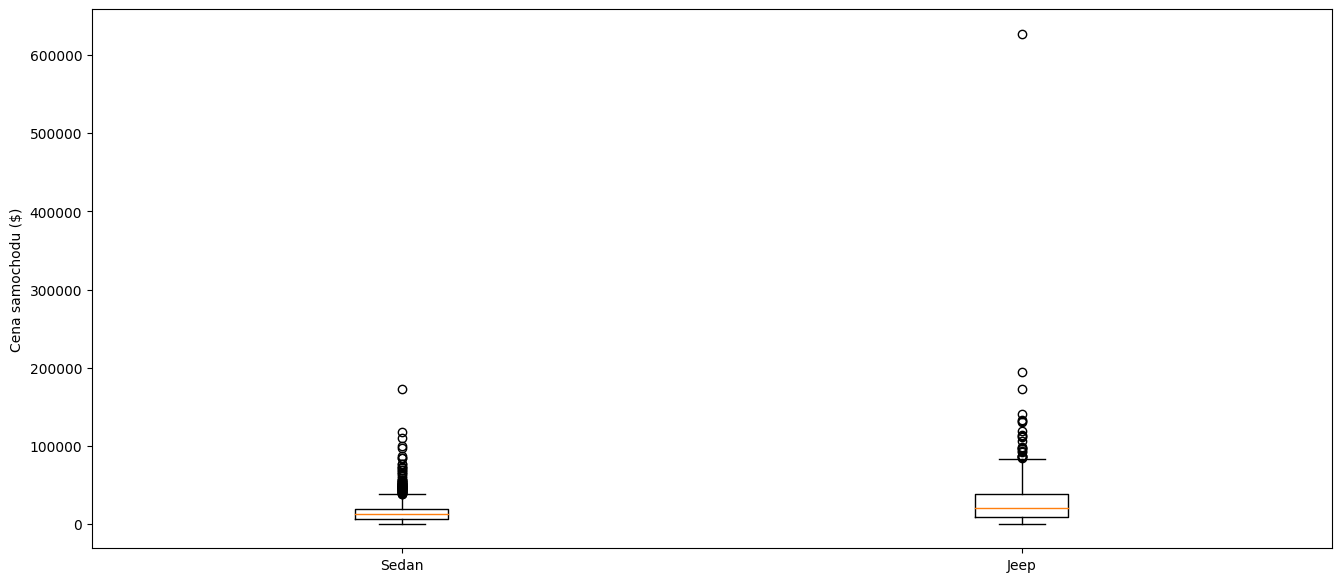

In [83]:
#Ramka-wąsy Sedan/Jeep
fig, ax = plt.subplots(figsize=(16,7))

ax.boxplot([df.loc[df['Category']=="Sedan", 'Price'].dropna(),
           df.loc[df['Category']=="Jeep", 'Price'].dropna(),])

ax.set_xticklabels(['Sedan','Jeep'])
ax.set_ylabel('Cena samochodu ($)')

plt.show()

Analizując powyższy skategoryzowany wykres ramka-wąsy, możemy zauważyć, że kategoria samochodu wpływa na jego cenę. Samochody typu Jeep są wyraźnie droższe, niż samochody typu Sedan.
Zauważyć także możemy, że ceny samochodów typu Jeep zaczynają się od sporo wyższych wartości ceny, niż samochody typu Sedan.

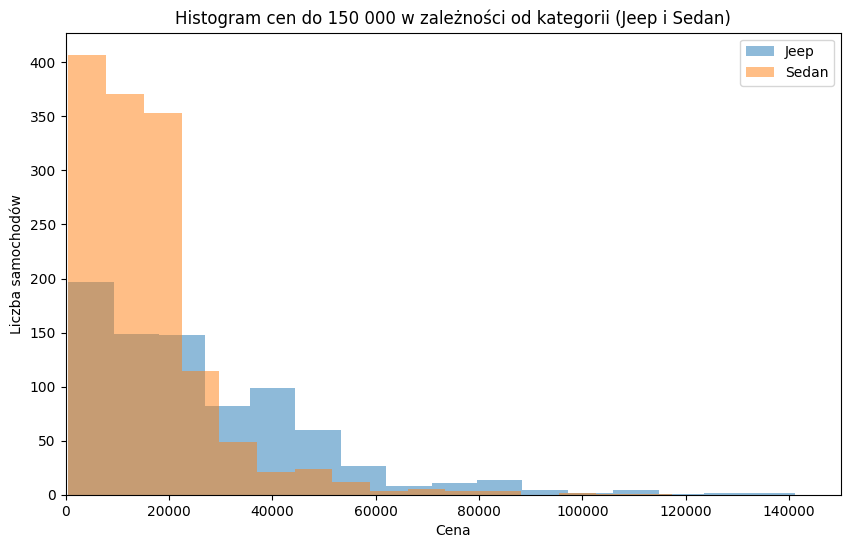

In [100]:
import matplotlib.pyplot as plt

# Filtrujemy dane dla cen poniżej 150 000 oraz dla rodzajów Jeep i Sedan
filtered_data = df[(df['Price'] <= 150000) & (df['Category'].isin(['Jeep', 'Sedan']))]

# Tworzenie histogramu
plt.figure(figsize=(10, 6))  # Rozmiar wykresu
for category in filtered_data['Category'].unique():
    plt.hist(filtered_data[filtered_data['Category'] == category]['Price'], bins=16, alpha=0.5, label=category)

# Dodanie etykiet i tytułu
plt.xlabel('Cena')
plt.ylabel('Liczba samochodów')
plt.title('Histogram cen do 150 000 w zależności od kategorii (Jeep i Sedan)')
plt.legend()  # Dodanie legendy

# Ustawienie limitu na osi x
plt.xlim(0, 150000)

# Wyświetlenie wykresu
plt.show()


Analizując powyższy historgam skategoryzowany dodatkowo możemy potwierdzić, że samochody rodzaju Jeep mają wyższe ceny niż samochody rodzaju Sedan.

# Weryfikacja hipotezy o zgodności rozkładu Globale_sales z rozkładem normalnym

Hipoteza zerowa - rozkład Price jest rozkładem normalnym

Hipoteza alternatywna - rozkład Price nie jest rozkładem normalnym

## Test Shapiro-Wilka

In [121]:
from scipy.stats import shapiro

In [122]:
stat, p_value = shapiro(df['Price'])

# Sprawdzenie wyniku testu
alpha = 0.05  # Poziom istotności
if p_value > alpha:
    print("Rozkład jest zbliżony do normalnego.")
else:
    print("Rozkład nie jest zbliżony do normalnego.")

Rozkład nie jest zbliżony do normalnego.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Z wyniku testu Shapiro - Wilka p_value ma wartość większą od współczynnika istotności, który przyjeliśmy na poziomie 0.05. Wynika z tego, że hipoteza zerowa jest obalona, a hipoteza alternawyna potwierdzona.

Rozkład Price nie jest rozkładem normalnym.

In [102]:
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg
import scipy.stats as stats

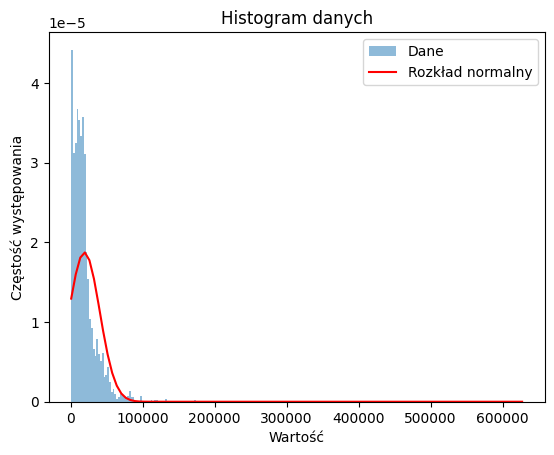

In [124]:
plt.hist(df['Price'], bins=250, density=True, alpha=0.5, label='Dane')

# Wygenerowanie danych z rozkładu normalnego o średniej i odchyleniu standardowym na podstawie danych
mean = np.mean(df['Price'])
std = np.std(df['Price'])
x = np.linspace(np.min(df['Price']), np.max(df['Price']), 100)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, 'r-', label='Rozkład normalny')

plt.xlabel('Wartość')
plt.ylabel('Częstość występowania')
plt.title('Histogram danych')
plt.legend()
plt.show()

Jak widać dane nie pokrywają się z linią rozkładu normalnego. Oznacza to, że zmienna Price nie ma rozkładu normalnego.

# Korelacja

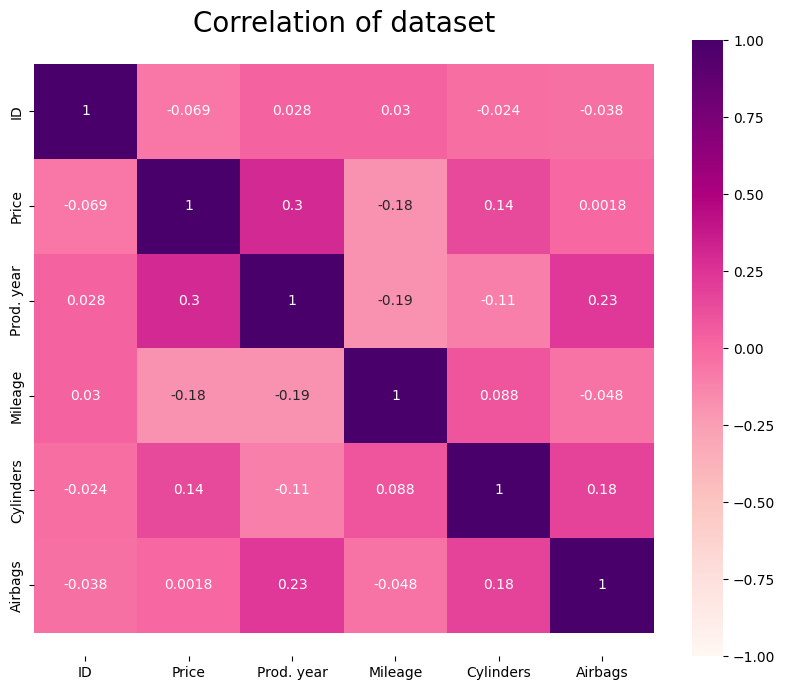

In [120]:
plt.figure(figsize=(10, 8))
numerical_columns = df.select_dtypes(include=['int', 'float'])

# Wyświetlamy wybrane kolumny

# wizualizacja Heatmapy korelacji
ax = sns.heatmap(numerical_columns.corr(),
                 xticklabels=numerical_columns.corr().columns,
                 yticklabels=numerical_columns.corr().columns,
                 cmap='RdPu',
                 vmin=-1, vmax=1,
                 annot=True, center=0)

# dekoracja wykresu
plt.title('Correlation of dataset', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25) # odsunięcie etykiet od wykresu

# Zmiana wymiaru etykiet
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Jak widać na powyższej macierzy, pomiędzy zmiennymi Mileage a Price istnieje bardzo mała korelacja ujemna na poziomie -0.18, co oznacza małą korelację oraz że wraz ze wzrotem jednej zmeinnej druga maleje i odwrotnie lub brak korelacji.


# Podział na zbiór treningowy i testowy

In [125]:
# wybór zmiennych do modelu: X - zmienne objaśniające, y - zmienna objaśniana(zależna)
X = df[['Mileage']]
y = df[['Price']]

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Model regresji

In [110]:
from sklearn.linear_model import LinearRegression

In [126]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [127]:
model.coef_ #współczynniki modelu

array([[-0.8765332]])

In [128]:
model.intercept_  #wyraz wolny


array([158681.21965405])

## Równanie regresji

y = -0.87 * x + 158681.2



## Wykonanie predykcji

In [129]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [130]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [131]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.028823309540656594,     R2_test = 0.043636003675916246,
MAE_train = 75662.78432211373,    MAE_test = 71850.37917533766,
MSE_train = 12853292139.326641,    MSE_test = 9986176513.733955,
RMSE_train = 113372.36056167589,    RMSE_test = 99930.85866604948 


## Analiza modelu

Odczytać możemy współczynniki determinacji.

*   Dla danych testowych wyszło 0,0436
*   Dla danych treningowych było to 0,0288

Analizując te zmienne, możemy stwierdzić, że model ma bardzo niskie wyniki wartości R kwadrat zarówno dla danych testowych jak i dla danych treningowych. Istnieje pewien poziom niezgodności między predykcjami a rzeczywistymi wartościami, jak wskazują wartości błędów (MAE, MSE, RMSE). Model może wykazywać pewną tendencję do niedouczenia lub nadmiernego dopasowania.



## Zestawienie modelu z wartościami rzeczywistymi

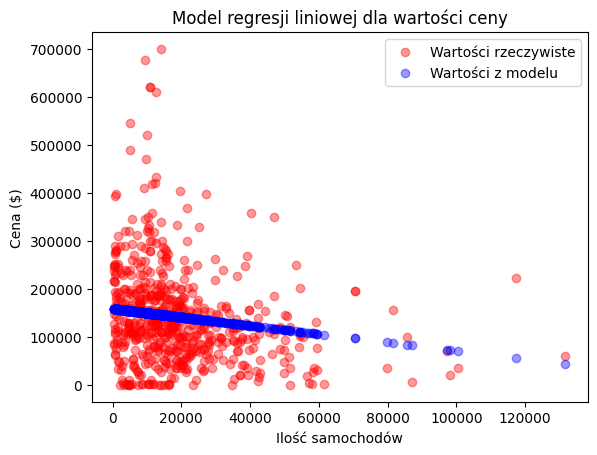

In [132]:
plt.scatter(X_test['Price'], y_test, color='red', alpha=0.4, label='Wartości rzeczywiste')
plt.scatter(X_test['Price'], y_predict_test, color='blue', alpha=0.4, label='Wartości z modelu')
plt.xlabel('Ilość samochodów')
plt.ylabel('Cena ($)')
plt.legend()
plt.title('Model regresji liniowej dla wartości ceny');

# Podsumowanie

Tematem naszego projektu było zbadanie wpływu przebiegu samochodu na jego cenę. Po przeprowadzeniu licznych analiz możemy stwierdzić, że hipoteza badawcza została obalona, z przeprowadzonej analizy wyniki, że dla analizowanego zbioru przebieg samochodu nie ma wpłwu na jego cenę. Otrzymany współczynnik korelacji jest co prawda ujemny (-0.18) jednak jest to zbyt mała wartość współczynnika aby stwierdzić, ujemną korelacje zmiennych Price oraz Mileage.
Udało nam się potwierdzić cel dodatkowy analizy - rodzaj samochodu ma wpływ na jego cenę - samochody typu Jeep są średnio droższe niż samochody typu Sedan. Wynika to prawdopodobnie z typu konstrukcji oraz tego, że produkcja podwozia typu Jeep jest zdecydowanie droższa, niż typu Sedan.

Tak niskie współczynniki R^2 oraz wysokie wartości błędów wskazują na to, że korelacja jest bardzo niska lub praktycznie nie istnieje, co jest bardzo zaskakującym wynikiem, ponieważ w realnym życiu przebieg samochodu wydaje się mieć znaczący wpływ na jego cenę. Możliwe że duża ilość modeli samochodów oraz spore odchylenie standardowe ceny samochodu w analizowanym zbiorze niweluje widoczność wpływu przebiegu na cenę samochodu. Kolejnym powodem dla którego nie obserwujemy korelacji między zmiennymi Price oraz Mileage może być duża rozbieżność klas samochodów w analizowanym zbiorze, to znaczy wysokiej klasy samochody premium ze sporym przebiegiem wciąż będą droższe niż nowe samochody niskiej klasy.
Podsumowając:
Dla analizowanego zbioru nie wykazaliśmy zależności pomiędzy przebiegiem samochodu a jego ceną.  